<a href="https://colab.research.google.com/github/Adeola-Jay/Gradient-boosted-tree-classifier/blob/main/gradient_boosted_tree_classifier_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gradient-boosted tree classifier

In [ ]:
# import mlflow and autolog machine learning runs:

import mlflow

mlflow.pyspark.ml.autolog()

In [ ]:
# Read data into spark Dataframe

fdk = spark.read.csv("/FileStore/tables/FaultDataset.csv",
                             header = "true",
                            inferSchema ="true")

In [ ]:
# Print the schema of the DataFrame
fdk.printSchema()

root
 |-- 1: double (nullable = true)
 |-- 2: double (nullable = true)
 |-- 3: double (nullable = true)
 |-- 4: double (nullable = true)
 |-- 5: double (nullable = true)
 |-- 6: double (nullable = true)
 |-- 7: double (nullable = true)
 |-- 8: double (nullable = true)
 |-- 9: double (nullable = true)
 |-- 10: double (nullable = true)
 |-- 11: double (nullable = true)
 |-- 12: double (nullable = true)
 |-- 13: double (nullable = true)
 |-- 14: double (nullable = true)
 |-- 15: double (nullable = true)
 |-- 16: double (nullable = true)
 |-- 17: double (nullable = true)
 |-- 18: double (nullable = true)
 |-- 19: double (nullable = true)
 |-- 20: double (nullable = true)
 |-- fault_detected: integer (nullable = true)



In [ ]:
# Display the all rows of FaultDataset
fdk.display()

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,fault_detected
0.3503125,0.3496875,0.35,0.3459375,0.3475,0.3459375,0.341875,0.3434375,0.355,0.3553125,0.3459375,0.3525,0.3575,0.3590625,0.35875,0.3484375,0.3590625,0.35,0.3559375,0.3490625,0
0.5090625,0.484375,0.046875,0.071875,0.06,0.0634375,0.0575,0.0546875,0.0559375,0.058125,0.0628125,0.065625,0.0640625,0.0634375,0.0534375,0.084375,0.0615625,0.05375,0.076875,0.056875,0
0.0928125,0.0975,0.1096875,0.1025,0.09625,0.1053125,0.09875,0.098125,0.091875,0.0909375,0.09875,0.103125,0.1,0.1034375,0.1015625,0.0978125,0.0990625,0.10375,0.098125,0.1040625,0
0.09375,0.089375,0.091875,0.0996875,0.0909375,0.096875,0.0940625,0.096875,0.096875,0.099375,0.099375,0.0959375,0.0959375,0.0940625,0.09125,0.0996875,0.09375,0.0934375,0.0971875,0.094375,0
0.036875,0.0440625,0.038125,0.0428125,0.0353125,0.0340625,0.033125,0.0403125,0.0346875,0.036875,0.035625,0.03625,0.0409375,0.039375,0.035,0.040625,0.0384375,0.036875,0.04,0.0371875,0
0.135625,0.3034375,0.13875,0.140625,0.126875,0.130625,0.139375,0.143125,0.1290625,0.140625,0.1340625,0.1396875,0.1384375,0.1453125,0.1453125,0.1496875,0.1440625,0.1359375,0.1453125,0.14625,0
0.3446875,0.35125,0.3353125,0.3471875,0.34625,0.348125,0.3478125,0.3521875,0.3525,0.35125,0.3571875,0.360625,0.3640625,0.36625,0.3640625,0.3634375,0.3475,0.35375,0.1575,0.351875,0
0.036875,0.035625,0.03125,0.0375,0.0390625,0.034375,0.0315625,0.031875,0.0378125,0.0321875,0.0371875,0.038125,0.035,0.0353125,0.0325,0.03,0.0325,0.0321875,0.0321875,0.03125,0
0.0371875,0.039375,0.033125,0.04,0.04125,0.03875,0.035625,0.0384375,0.0378125,0.0365625,0.033125,0.0365625,0.03375,0.034375,0.0346875,0.04125,0.0365625,0.035,0.034375,0.0396875,0
0.3590625,0.3609375,0.360625,0.3590625,0.355,0.365,0.355625,0.358125,0.3575,0.3578125,0.355625,0.3584375,0.3521875,0.3459375,0.3521875,0.3509375,0.3525,0.35625,0.353125,0.3540625,0


In [ ]:
# Grouping FaultDataset using the column that is the target (fault detected) 
# Count the number of occurrences identified with each value
target_gr1 = fdk.groupBy("fault_detected").count()

# Show the distribution of the target_group
target_gr1.show()


+--------------+-----+
|fault_detected|count|
+--------------+-----+
|             1| 4646|
|             0| 4646|
+--------------+-----+



In [ ]:
# Using matplotlib we visualize the distribution of the target group. 

import matplotlib.pyplot as plt

In [ ]:
# Group the Df by the target_group and count the number of occurrences of each value
target_gr2 = fdk.groupBy("fault_detected").count().orderBy("fault_detected")

# Extract the values of the target column and the count column as lists
Targets = target_gr2.select("fault_detected").rdd.flatMap(lambda x: x).collect()
Num_counts = target_gr2.select("count").rdd.flatMap(lambda x: x).collect()

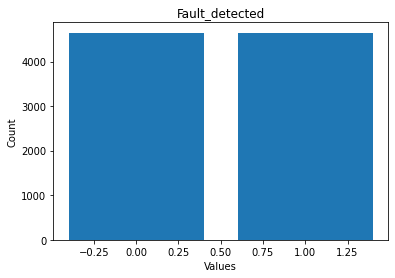

In [ ]:
# Bar chart plot
plt.bar(Targets, Num_counts)
plt.title("Fault_detected")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

In [ ]:
# Preprocessing data

from pyspark.ml.feature import RFormula

fdk = fdk.drop("features")

preprocess = RFormula(formula = "fault_detected ~ .") 

fdk = preprocess.fit(fdk).transform(fdk) 

fdk.show(5)

2023/04/15 10:30:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a665673647b3431fbde3bdbcd6d6de23', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+
|0.3

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(fdk)

2023/04/15 10:30:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1b17244939454d098e5a3cf7e521be7b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow


In [ ]:
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(fdk)

2023/04/15 10:30:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a879051fe7f84078b392c34bbf99cf09', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow


In [ ]:
# split the data into training and test datasets

(Train_dt,Test_dt) = fdk.randomSplit([0.7, 0.3])

In [ ]:
# Train a GBT model.
gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxIter=10)

In [ ]:
# Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, gbt])

In [ ]:
# Train model.  This also runs the indexers.
model = pipeline.fit(Train_dt)

2023/04/15 10:30:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f6a18de34ba643479876ac8c43a8472c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/15 10:30:32 WARNING mlflow.pyspark.ml: Model inputs contain unsupported Spark data types: [StructField('features', VectorUDT(), True)]. Model signature is not logged.
2023/04/15 10:30:50 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/15 10:31:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


In [ ]:
# Make predictions.
predictions = model.transform(Test_dt)

In [ ]:
# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         0.0|[0.025625,0.03593...|
|       0.0|         1.0|[0.0259375,0.0284...|
|       0.0|         1.0|[0.02625,0.0325,0...|
|       0.0|         1.0|[0.02625,0.033437...|
|       0.0|         1.0|[0.0265625,0.0296...|
+----------+------------+--------------------+
only showing top 5 rows



In [ ]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.0350442


In [ ]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy = %g " % (accuracy))

Accuracy = 0.964956 


In [ ]:
# summary only

gbtModel = model.stages[2]
print(gbtModel)  

GBTClassificationModel: uid = GBTClassifier_777482ef9aa7, numTrees=10, numClasses=2, numFeatures=20
